<h2 style = "font-size:3rem;color:orange">Convolution Reverb</h2>

<h5> Impulse response </h5>

LTI systems can be described through difference equations, of which the general difference equation is defined as

$y[n] = \sum_{k=1}^{N} a_ky[n-k] + \sum_{k=0}^{L} b_kx[n-k] $ 


Impulse response of FIR system:

$h[n] = \sum_{k=0}^{L} b_k\delta[n-k] $

Impulse response of IIR system: 

$h[n] = \sum_{k=1}^{N} a_kh[n-k] + \sum_{k=0}^{L} b_k\delta[n-k] $ 

<h5>Convolution </h5>

Convolution can be used to determine a system's output when the impulse response is knows (with unknown difference equation). An input $x$ can be convolved with impulse $h$ yielding 

$y[n] = x[n] \ast h[n] = \sum_{m = -\infty}^{\infty} x[n - m] \cdot h[m]$


<h5> Code Example </h5>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd 
import librosa
import librosa.display
import pandas as pd 

Create a custom input signal and impulse response

In [2]:
x = [1, 0.5, -0.9, 0.25, 1, 0.33, 0.66]
h = [0.25, 0.5, 0.75]

Perform 'full' convolution

In [3]:
M = len(x);
N = len(h);

X = np.append(x, np.zeros(N, dtype ='int'))
H = np.append(h, np.zeros(M, dtype ='int'))
y = np.zeros(M+N)

for n in range(len(y)-1):
    for m in range(M):
        if n-m >= 0:
            y[n]=y[n]+X[n-m]*H[m];

And plot the results

<StemContainer object of 3 artists>

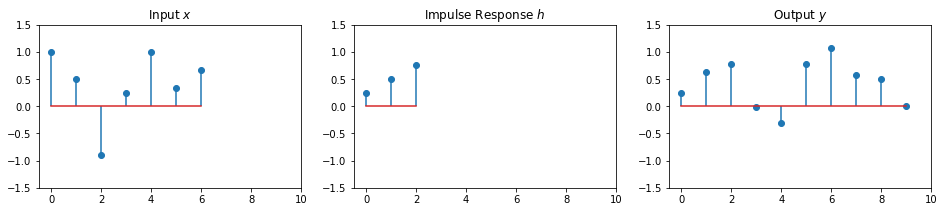

In [4]:
plt.figure(figsize=(16, 3))

plt.subplot(1,3,1)
plt.title('Input $x$')
plt.xlim(-0.5, 10)
plt.ylim(-1.5, 1.5)
plt.stem(x)

plt.subplot(1,3,2)
plt.xlim(-0.5, 10)
plt.ylim(-1.5, 1.5)
plt.title('Impulse Response $h$')
plt.stem(h)

plt.subplot(1,3,3)
plt.xlim(-0.5, 10)
plt.ylim(-1.5, 1.5)
plt.title('Output $y$')
plt.stem(y)



<h5>Convolution Reverb</h5>

Load an impulse response

In [5]:
h , sr = librosa.load('../samples/St_Nicolaes_Church.wav')

<AxesSubplot:title={'center':'Impulse Response'}>

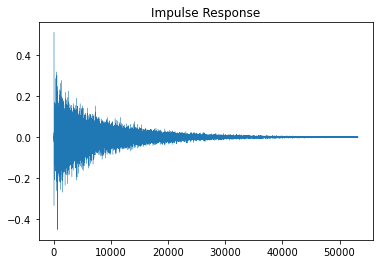

In [6]:
h_trimmed , _ = librosa.effects.trim(h, top_db = 40)
pd.Series(h_trimmed).plot(lw=0.3,
                          title='Impulse Response')

Import an input signal

In [7]:
x , sr2 = librosa.load('../samples/08 Oiseaux exotiques ter.wav')

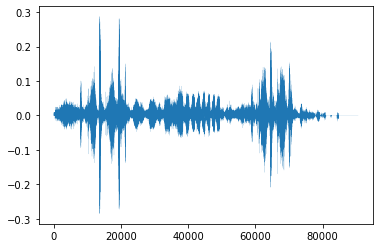

In [8]:
plt.plot(x, linewidth = 0.1)

Convolve input signal with impulse response

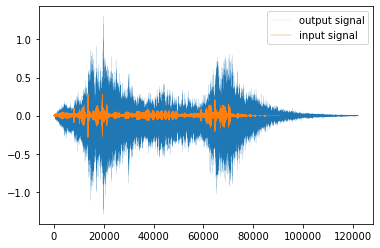

In [9]:
y = np.convolve(x , h)

plt.plot(y[0:122000], label = 'output signal', linewidth = 0.1)
plt.plot(x[0:122000], label = 'input signal', linewidth = 0.4)
plt.legend()

#for n in range(0, len(x)):
    #for m in range(0, len(h)):


In [10]:
print('input signal')
ipd.Audio(data = x, rate = sr)


input signal


In [11]:
print('output signal')
ipd.Audio(data = y, rate = sr)

output signal
